In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
from utils.read_EMR import read_EMR

In [3]:
folder_path="dataset"
all_Labels,all_EMR_data,all_Name_files=read_EMR(folder_path)

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import roc_auc_score

In [5]:
df=all_EMR_data

In [6]:
labels=np.array(all_Labels)[:,1]

In [7]:
X=df.values
y=labels

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Tính các chỉ số
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

# In kết quả
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 12.9804
Mean Squared Error (MSE): 256.0273
Root Mean Squared Error (RMSE): 16.0009
R² Score: 0.1023


In [18]:
df_result = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})

# Xem 5 dòng đầu
print(df_result.head())

   y_test      y_pred
0   259.7  274.075297
1   279.3  258.374757
2   273.7  265.577386
3   256.2  269.861819
4   273.0  260.672698


In [16]:
for i,j in zip(y_pred,y_test):
    print(i,j)

274.07529722357066 259.7
258.3747566317537 279.3
265.5773858057952 273.7
269.86181879328075 256.2
260.6726982824544 273.0
250.60973336996207 224.0
277.58645864777213 284.2
270.60570070448216 287.7
273.4239767040677 275.8
270.3115982943833 245.0
263.39200646569066 268.09999999999997
271.11626009284595 240.09999999999997
264.6380357155865 277.90000000000003
271.95191656542386 273.7
268.54643295972767 277.2
265.06048626039035 272.3
267.31822502325747 275.09999999999997
268.15210249334905 282.8
269.4594055706861 275.09999999999997
274.33655375396296 279.3
259.2314112373164 238.0
279.3872144529799 270.2
270.83173159323013 282.09999999999997
268.888132562671 273.7
265.80524423383537 254.79999999999998
261.80216931691183 238.0
269.73247344448873 275.09999999999997
275.5037187773285 268.8
249.21157376863263 280.0
271.7652354665777 282.8
261.95735246773563 287.0
264.15457866098944 256.90000000000003
260.32358384392893 210.0
266.052323097879 286.3
266.9953439478269 282.09999999999997
269.1143280

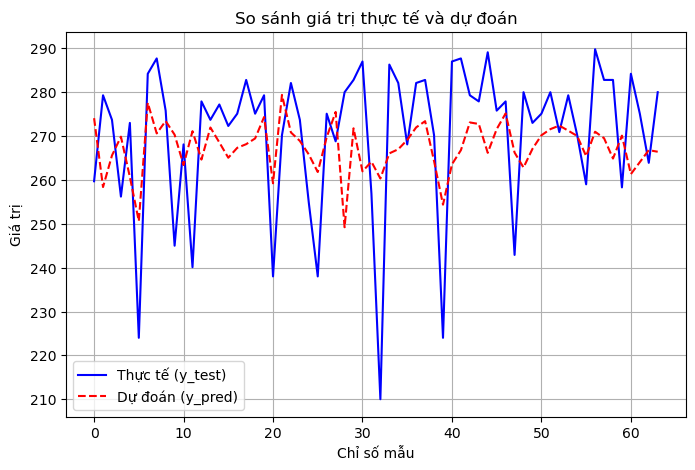

In [17]:
plt.figure(figsize=(8,5))
plt.plot(y_test, label='Thực tế (y_test)', color='blue')
plt.plot(y_pred, label='Dự đoán (y_pred)', color='red', linestyle='--')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Giá trị')
plt.title('So sánh giá trị thực tế và dự đoán')
plt.legend()
plt.grid(True)
plt.show()
